# PCA and K-Means Clustering of Iris Data

In this notebook, we will use principal component analysis (PCA) and K-Means clustering to analyze the famous iris dataset. The iris dataset contains 150 samples of three different species of iris flowers: setosa, versicolor, and virginica. Each sample has four features: sepal length, sepal width, petal length, and petal width. The dataset is often used for classification tasks, but we will try to find some patterns in the data using unsupervised learning methods.

## Principal Component Analysis

Principal component analysis (PCA) is a technique for reducing the dimensionality of a dataset by projecting it onto a lower-dimensional subspace that preserves most of the variance in the data. PCA can help us to visualize high-dimensional data, remove noise, and find latent variables.

We will use the sklearn.decomposition.PCA class to perform PCA on the iris dataset. We will first fit a PCA model with four components, which is the same as the original number of features. Then we will plot the cumulative contribution rate of each component, which shows how much variance is explained by each component. We will see that the first two components account for more than 95% of the variance, which means we can reduce the dimensionality from four to two without losing much information.

## K-Means Clustering
K-Means clustering is a simple and popular algorithm for finding clusters in a dataset. The algorithm works by randomly initializing K centroids, assigning each data point to the nearest centroid, and updating the centroids based on the average of the assigned points. This process is repeated until the centroids converge or a maximum number of iterations is reached.

We will implement our own K-Means clustering algorithm using NumPy. We will use the np.linalg.norm function to calculate the Euclidean distance between points and centroids, and the np.argmin function to find the index of the minimum value along an axis. We will also use the np.random.choice function to randomly select K initial centroids from the data points. We will set K to 3, which is the same as the number of classes in the iris dataset, and run the algorithm for 10 iterations.

After performing K-Means clustering on the reduced data, we will plot the clusters and their centroids using Matplotlib. We will use different colors and labels for each cluster, and mark the centroids with red plus signs. We will also compare our clustering results with the true labels of the iris species

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load data
iris = load_iris()
X = iris.data
y = iris.target

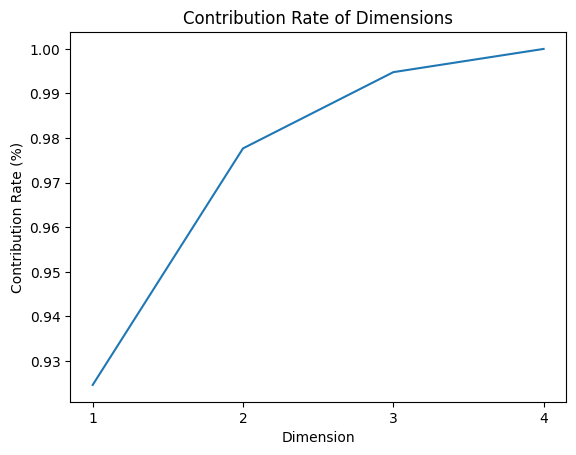

In [2]:
# Perform PCA with four components
pca = PCA(n_components=4)
pca.fit(X)

# Plot contribution rate
dimensions = np.arange(1, len(pca.explained_variance_ratio_) + 1)
contribution = np.cumsum(pca.explained_variance_ratio_)
plt.plot(dimensions, contribution)
plt.xlabel('Dimension')
plt.ylabel('Contribution Rate (%)')
plt.xticks(dimensions.astype(int))
plt.title('Contribution Rate of Dimensions')
plt.show()

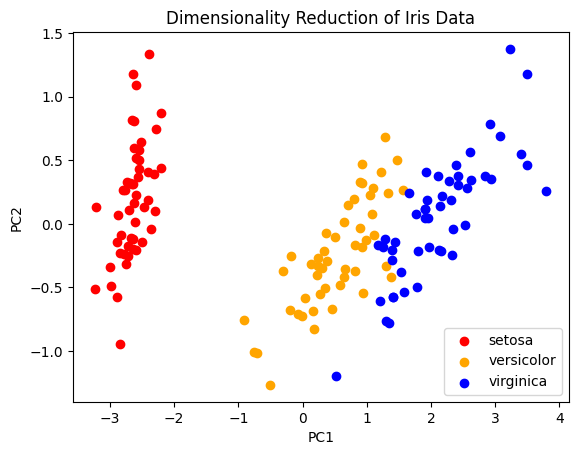

In [3]:
# Perform PCA with four components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# Plot reduced data
colors = ['red', 'orange', 'blue']
for target in np.unique(y):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], c=colors[target], label=iris.target_names[target])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Dimensionality Reduction of Iris Data')
plt.legend()
plt.show()

In [4]:
# Define K-Means class
class KMeans:
    def __init__(self, k, times):
        self.k = k
        self.times = times
        self.centroids = None

    def fit(self, X):
        # Randomly initialize k centroids from X
        self.centroids = X[np.random.choice(range(X.shape[0]), size=self.k, replace=False)]
        
        # Repeat for a given number of times
        for _ in range(self.times):
            # Calculate distances between points and centroids
            distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids, axis=-1)
            # Assign labels based on minimum distance
            labels = np.argmin(distances, axis=-1)
            
            # Update centroids based on mean of assigned points
            for i in range(self.k):
                self.centroids[i] = np.mean(X[labels == i], axis=0)

    def predict(self, X):
        # Calculate distances between points and centroids
        distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids, axis=-1)
        # Assign labels based on minimum distance
        labels = np.argmin(distances, axis=-1)
        return labels

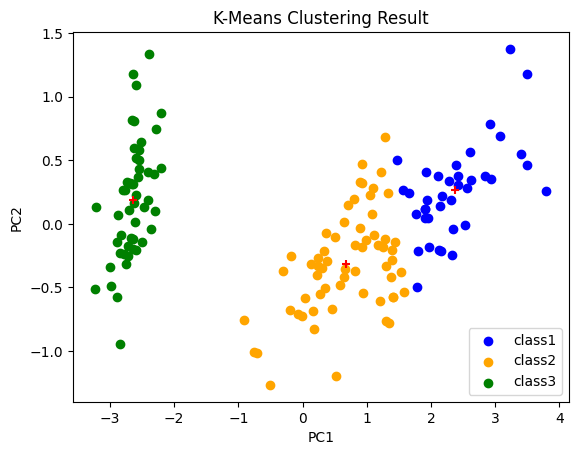

In [5]:
# Create K-Means instance and fit reduced data
kmeans = KMeans(k=3, times=10)
kmeans.fit(X_pca)

# Predict labels for reduced data
labels = kmeans.predict(X_pca)

# Plot clusters and centroids
colors = ['blue', 'orange', 'green']
class_labels = ['class1', 'class2', 'class3'] 
for label in np.unique(labels):
    plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], c=colors[label], label=class_labels[label])

plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='+')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering Result')
plt.legend()
plt.show()

In [6]:
# Output relevant information
print("Contribution rate =", pca.explained_variance_ratio_)
print("Variance of features =", pca.explained_variance_)
print("Original data\n", pd.DataFrame(X))
print("Reduced data\n", pd.DataFrame(X_pca))

Contribution rate = [0.92461872 0.05306648 0.01710261 0.00521218]
Variance of features = [4.22824171 0.24267075 0.0782095  0.02383509]
Original data
        0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]
Reduced data
             0         1         2         3
0   -2.684126  0.319397 -0.027915 -0.002262
1   -2.714142 -0.177001 -0.210464 -0.099027
2   -2.888991 -0.144949  0.017900 -0.019968
3   -2.745343 -0.318299  0.031559  0.075576
4   -2.728717  0.326755  0.090079  0.061259
..        ...       ...       ...       ...
145  1.944110  0.187532  0.177825 -0.426196
146  1.527167 -0.375317 -0.121898 -0.254367
147  1.764346  0.078859  0.130482 -0.137001
148  1.900942  0.116628  0.723252 -0.044595
149  1.390189 -0.282661  0.362910  0.155